In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the config of the plots we will create


In [67]:
df1 = pd.read_csv(r"C:\Users\parde\OneDrive\Documents\movies.csv")
df1.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [68]:
for col in df.columns:
    percent_missing = round(np.mean(df[col].isnull()),2)
    print("{} - {}%".format(col,percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [69]:
df1.shape

(7668, 15)

In [70]:
df1.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [71]:
df1.describe()

year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

In [72]:
df1["rating"] = df1["rating"].fillna(df1["rating"].mode())

In [73]:
df1["budget"] = df1["budget"].fillna(df1["budget"].mean())

In [74]:
df1 = df1.dropna(subset = ["rating","gross","released","score","votes","writer","star","country","company","runtime"])

In [75]:
df1.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [76]:
df1.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [77]:
df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [78]:
for col in df1.columns:
    unique_ = df1[col].unique()
    print("{} - {}----------------------------------".format(col,unique_))

name - ['The Shining' 'The Blue Lagoon'
 'Star Wars: Episode V - The Empire Strikes Back' ... 'The Quarry' 'Tulsa'
 'I Am Fear']----------------------------------
rating - ['R' 'PG' 'G' 'Not Rated' 'NC-17' 'Approved' 'PG-13' 'Unrated' 'X' 'TV-PG'
 'TV-MA' 'TV-14']----------------------------------
genre - ['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Animation' 'Romance' 'Music' 'Western' 'Thriller'
 'Sci-Fi' 'Mystery' 'Sport' 'Musical']----------------------------------
year - [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]----------------------------------
released - ['June 13, 1980 (United States)' 'July 2, 1980 (United States)'
 'June 20, 1980 (United States)' ... 'April 17, 2020 (Mexico)'
 'June 3, 2020 (United States)' 'March 3, 2020 (United States)']-----------------------------

In [79]:
df1['released'] = df1['released'].str.replace(" (United States)", "", regex=False)


In [80]:
df1['rating'] = df1['rating'].str.replace("Unrated", "Not Rated", regex=False)

In [81]:
for col in df1.columns:
    unique_ = df1[col].unique()
    print("{} - {}----------------------------------".format(col,unique_))

name - ['The Shining' 'The Blue Lagoon'
 'Star Wars: Episode V - The Empire Strikes Back' ... 'The Quarry' 'Tulsa'
 'I Am Fear']----------------------------------
rating - ['R' 'PG' 'G' 'Not Rated' 'NC-17' 'Approved' 'PG-13' 'X' 'TV-PG' 'TV-MA'
 'TV-14']----------------------------------
genre - ['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Animation' 'Romance' 'Music' 'Western' 'Thriller'
 'Sci-Fi' 'Mystery' 'Sport' 'Musical']----------------------------------
year - [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]----------------------------------
released - ['June 13, 1980' 'July 2, 1980' 'June 20, 1980' ...
 'April 17, 2020 (Mexico)' 'June 3, 2020' 'March 3, 2020']----------------------------------
score - [8.4 5.8 8.7 7.7 7.3 6.4 7.9 8.2 6.8 7.  6.1 5.3 7.1 7.2 6.6 6.9 6.5 6.7
 6.2

In [82]:
df1["budget"] = df1["budget"].astype("int64")

In [83]:
df1["gross"] = df1["gross"].astype("int64")

In [84]:
df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [85]:
df1.sort_values(by = ["gross"],inplace =False,ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
3394                                  I Want You          R   Crime  1998   
2906                                      Pusher  Not Rated   Crime  1996   
3818                        Love, Honor and Obey          R  Comedy  2000   
7580                         Run with the Hunted  Not Rated   Crime  2019   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes  \
5445                  December 18, 2009    7.8  1100000.0   
7445                     April 26, 2019    8.4   903000.0   
3045                  December 19, 1997    7.8  1100000.0   
6663                  December 18, 2015    7.8   876000.0   
7244                     April 27, 2018    8.4   897000.0   
...                                 ...    ...        ...   
3394  October 30, 1998 (United Kingdom)    6.1     2900.0   
2906          August 30, 1996 (Denmark)    7.4    37000.0   
3818                   February 9, 2001    6.5     5200.0   
7580                      June 26, 2020    5.2      735.0   
3203           October 1, 1997 (Brazil)    5.7     5800.0   

                  director              writer               star  \
5445         James Cameron       James Cameron    Sam Worthington   
7445         Anthony Russo  Christopher Markus  Robert Downey Jr.   
3045         James Cameron       James Cameron  Leonardo DiCaprio   
6663           J.J. Abrams     Lawrence Kasdan       Daisy Ridley   
7244         Anthony Russo  Christopher Markus  Robert Downey Jr.   
...                    ...                 ...                ...   
3394  Michael Winterbottom        Eoin McNamee       Rachel Weisz   
2906  Nicolas Winding Refn           Jens Dahl         Kim Bodnia   
3818       Dominic Anciano     Dominic Anciano        Sadie Frost   
7580             John Swab           John Swab        Ron Perlman   
3203          George Huang           Andy Burg       Will Friedle   

             country     budget       gross  \
5445   United States  237000000  2847246203   
7445   United States  356000000  2797501328   
3045   United States  200000000  2201647264   
6663   United States  245000000  2069521700   
7244   United States  321000000  2048359754   
...              ...        ...         ...   
3394  United Kingdom   35589876        1672   
2906         Denmark   35589876        1605   
3818  United Kingdom   35589876        1400   
7580   United States   35589876         682   
3203   United States   15000000         309   

                                     company  runtime  
5445                   Twentieth Century Fox    162.0  
7445                          Marvel Studios    181.0  
3045                   Twentieth Century Fox    194.0  
6663                               Lucasfilm    138.0  
7244                          Marvel Studios    149.0  
...                                      ...      ...  
3394           Polygram Filmed Entertainment     87.0  
2906                    Balboa Entertainment    110.0  
3818  British Broadcasting Corporation (BBC)    103.0  
7580                           Roxwell Films     93.0  
3203                                Daybreak     85.0  

[7412 rows x 15 columns]

In [ ]:
pd.set_option("display.max_rows",None) # display all truncated rows

In [88]:
df1.sort_values(by = ["gross"],inplace =False,ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [97]:
df1["company"].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [96]:
df1[["company"]].drop_duplicates().sort_values(by = "company",ascending = False)

company
7129                                            thefyzz
5664                                        micro_scope
6412                           iDeal Partners Film Fund
4007                                           i5 Films
6793                                         i am OTHER
6420                                               erbp
3776                                     double A Films
524                           Zupnik-Curtis Enterprises
3330                        Zucker Brothers Productions
146                                    Zoetrope Studios
2213                                 Zeta Entertainment
6222                      Zentropa International Norway
3698                            Zentropa Entertainments
535                                Zenith Entertainment
5180                                    Zazen Produções
3193                                        ZapPictures
1321                           Zanuck/Brown Productions
1329                        Zacharias-Buhai Productions
789                           Young Sung Production Co.
5125                         Young Hannibal Productions
5499                                        Yellow Bird
4618                                     Yash Raj Films
4990                          Yari Film Group Releasing
5410                              Yari Film Group (YFG)
7576                                   Yale Productions
3310                              X-Filme Creative Pool
6798  Wytwórnia Filmów Dokumentalnych i Fabularnych ...
6265                            Worldview Entertainment
4392                        World of Wonder Productions
4999                World Wrestling Entertainment (WWE)
425                                 World Film Services
712                                 Working Title Films
3158                                        Working Dog
3637                               Woodline Productions
4272                                       Wiseau-Films
450                                 Winwood Productions
3624                              Winslow Partners Ltd.
3943                                      Winkler Films
2084                                      WingNut Films
2355                               Wildwood Enterprises
6606                                     Wildgaze Films
5276                                         Wild Bunch
7032                                       Wigwam Films
4863                    Wiedemann & Berg Filmproduktion
5550                                Why Not Productions
4572                                   Whitewater Films
6616                             WhiteFlame Productions
1306                                         White Lair
1475                                        White Eagle
5715                                       Whenua Films
1744                                     Westerly Films
1304                      Weintraub Entertainment Group
7225                                       Ways & Means
5496                              Wayfare Entertainment
6672                                      Waverly Films
5395                                             Warp X
4557                                         Warp Films
4505                  Warner Independent Pictures (WIP)
7267                              Warner Bros. Pictures
2284                  Warner Bros. Family Entertainment
6578                  Warner Bros. Digital Distribution
317                              Warner Bros. Animation
0                                          Warner Bros.
7401                             Warner Animation Group
40                              Walt Disney Productions
403                                Walt Disney Pictures
117                       Walt Disney Animation Studios
5075                                       Walden Media
729                                       WW Production
4975                                                WIP
6166                                        Votiv Films
5272            

In [105]:
df1.drop_duplicates().reset_index(drop = True).head(10)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R     Action  1980   
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders      R  Biography  1980   

            released  score      votes            director  \
0      June 13, 1980    8.4   927000.0     Stanley Kubrick   
1       July 2, 1980    5.8    65000.0      Randal Kleiser   
2      June 20, 1980    8.7  1200000.0      Irvin Kershner   
3       July 2, 1980    7.7   221000.0        Jim Abrahams   
4      July 25, 1980    7.3   108000.0        Harold Ramis   
5        May 9, 1980    6.4   123000.0  Sean S. Cunningham   
6      June 20, 1980    7.9   188000.0         John Landis   
7  December 19, 1980    8.2   330000.0     Martin Scorsese   
8      June 19, 1981    6.8   101000.0      Richard Lester   
9       May 16, 1980    7.0    10000.0         Walter Hill   

                    writer             star         country    budget  \
0             Stephen King   Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole   Brooke Shields   United States   4500000   
2           Leigh Brackett      Mark Hamill   United States  18000000   
3             Jim Abrahams      Robert Hays   United States   3500000   
4       Brian Doyle-Murray      Chevy Chase   United States   6000000   
5            Victor Miller     Betsy Palmer   United States    550000   
6              Dan Aykroyd     John Belushi   United States  27000000   
7             Jake LaMotta   Robert De Niro   United States  18000000   
8             Jerry Siegel     Gene Hackman   United States  54000000   
9              Bill Bryden  David Carradine   United States  10000000   

       gross                       company  runtime  
0   46998772                  Warner Bros.    146.0  
1   58853106             Columbia Pictures    104.0  
2  538375067                     Lucasfilm    124.0  
3   83453539            Paramount Pictures     88.0  
4   39846344                Orion Pictures     98.0  
5   39754601            Paramount Pictures     95.0  
6  115229890            Universal Pictures    133.0  
7   23402427  Chartoff-Winkler Productions    129.0  
8  108185706                Dovemead Films    127.0  
9   15795189                United Artists    100.0

In [101]:
df1["company"].unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Beijing Diqi Yinxiang Entertainment', 'Prowess Pictures',
       'Pryor Entertainment'], shape=(2242,), dtype=object)

In [ ]:
# budget high correlation with gross
# company high correlation with gross 

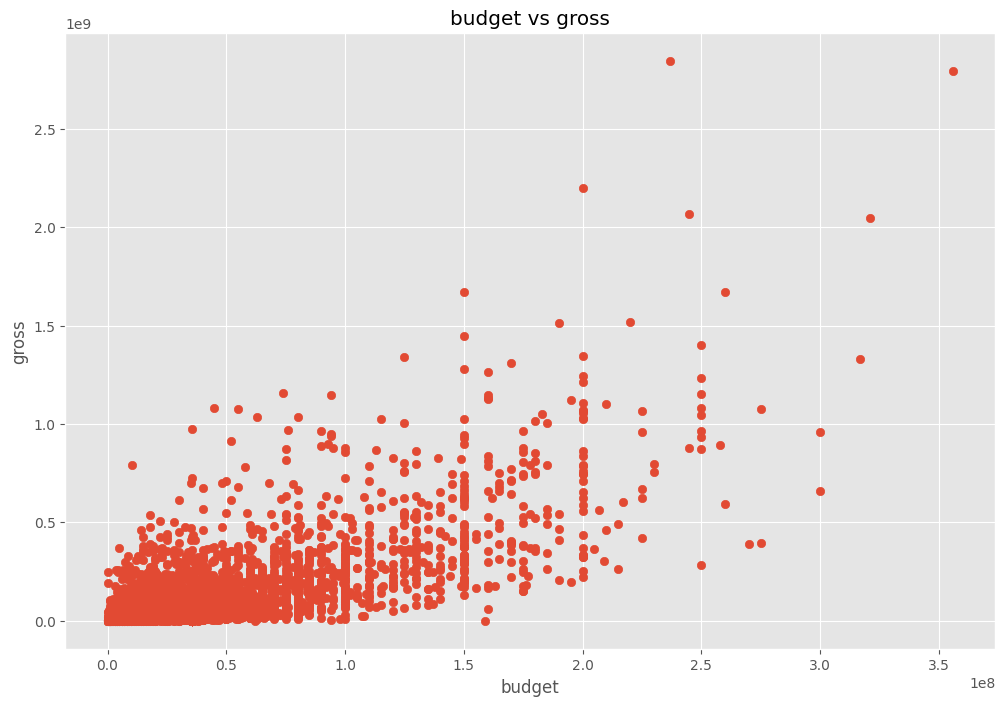

In [110]:
plt.scatter(x=df1["budget"],y=df1["gross"])
plt.title("budget vs gross")
plt.xlabel("budget")
plt.ylabel("gross")
plt.show()

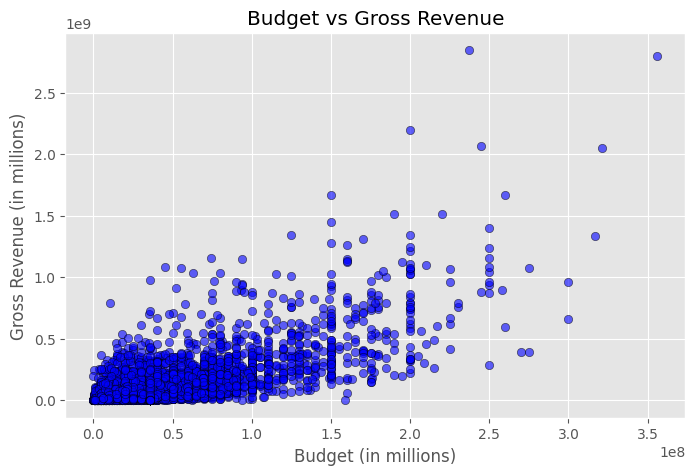

In [111]:
plt.figure(figsize=(8,5))
plt.scatter(df1["budget"], df1["gross"], alpha=0.6, color='blue', edgecolor='k')
plt.title("Budget vs Gross Revenue")
plt.xlabel("Budget (in millions)")
plt.ylabel("Gross Revenue (in millions)")
plt.grid(True)
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

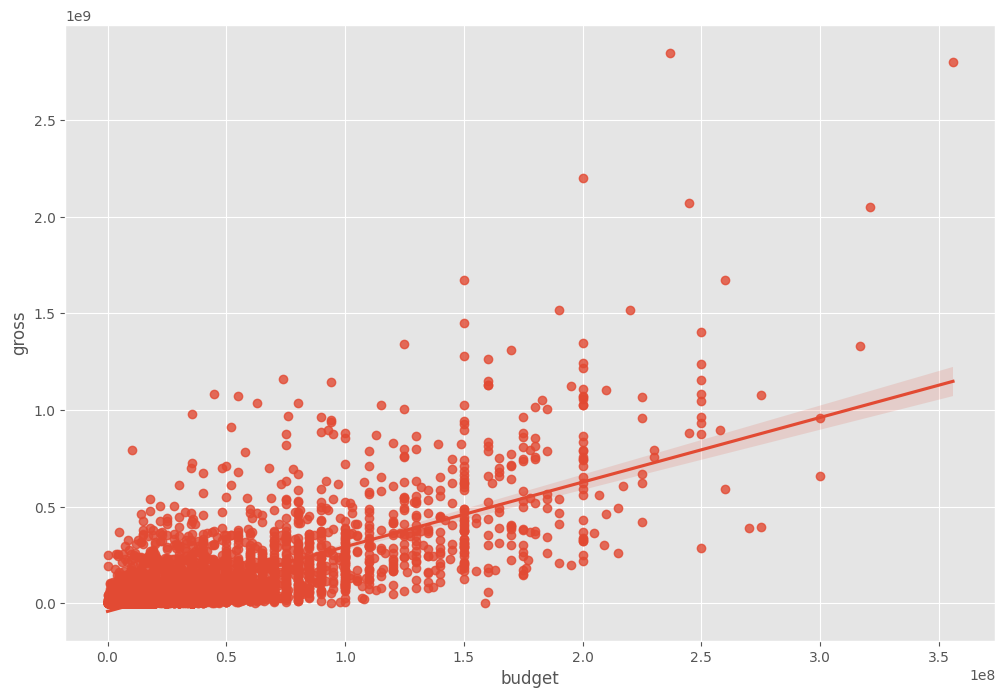

In [108]:
sns.regplot(x="budget",y="gross",data = df1)

<Axes: xlabel='budget', ylabel='gross'>

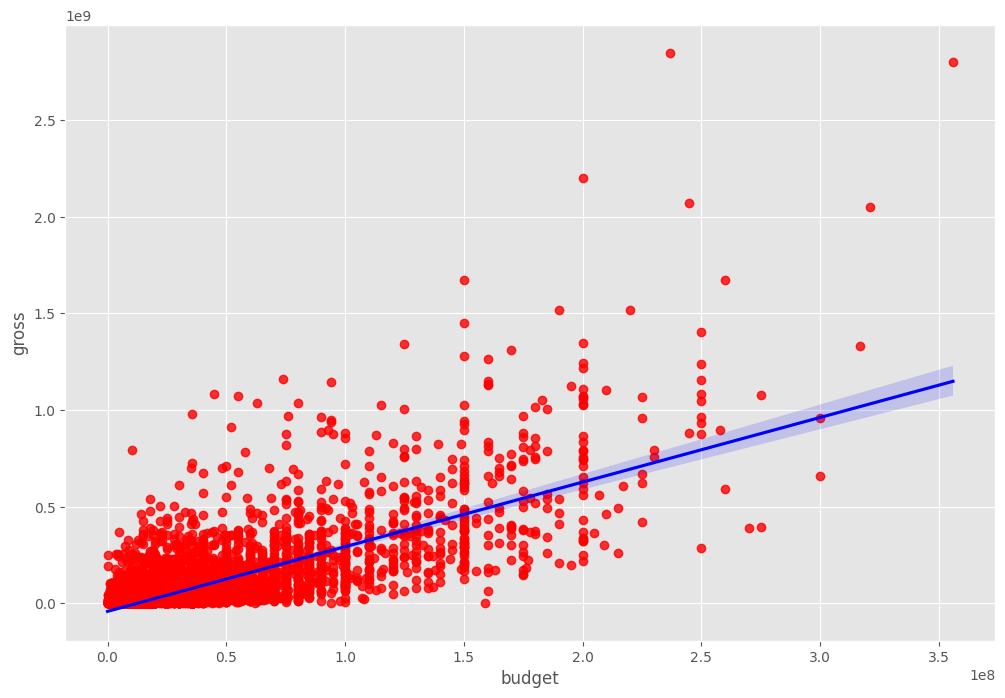

In [ ]:
sns.regplot(x="budget",y="gross",data = df1,scatter_kws = {"color":"red"},line_kws = {"color":"blue"})

# blue line = best fit regression line shows the trend between budget and gross

# if blue line is upward means as budget increse gross also increase therefore +ve correlation
# if flat or downward then there is no correlation

In [130]:
df1.corr(method ="pearson", numeric_only=True) #pearson #kendall #spearman  

year     score     votes    budget     gross   runtime
year     1.000000  0.093951  0.218941  0.268662  0.258826  0.114237
score    0.093951  1.000000  0.415190  0.061506  0.188071  0.397226
votes    0.218941  0.415190  1.000000  0.420611  0.631110  0.309945
budget   0.268662  0.061506  0.420611  1.000000  0.714607  0.266956
gross    0.258826  0.188071  0.631110  0.714607  1.000000  0.245117
runtime  0.114237  0.397226  0.309945  0.266956  0.245117  1.000000

In [ ]:
correlation = df1["budget"].corr(df1["gross"])
print("Correlation between budget and gross:", round(correlation,1))

#1 = perfect +ve correlation
#0.0 = no correlation 
# -1 = perfect -ve correlation


Correlation between budget and gross: 0.7


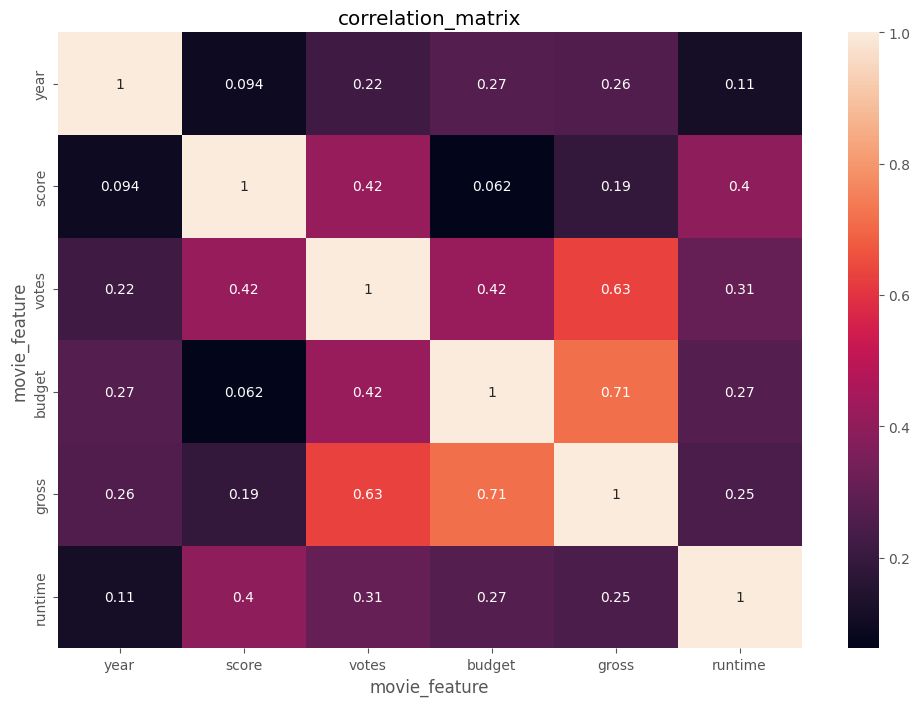

In [133]:
correlation_matrix = df1.corr(method ="pearson", numeric_only=True)
sns.heatmap(correlation_matrix,annot = True)
plt.title("correlation_matrix")
plt.xlabel("movie_feature")
plt.ylabel("movie_feature")
plt.show()

In [134]:

# Using factorize - this assigns a random numeric value for each unique categorical value

df1.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name      1.000000  0.148197  0.030281  0.964746  0.958840 -0.040444   
rating    0.148197  1.000000 -0.082605  0.161988  0.150491  0.016412   
genre     0.030281 -0.082605  1.000000  0.032063  0.030674 -0.009702   
year      0.964746  0.161988  0.032063  1.000000  0.993516 -0.038545   
released  0.958840  0.150491  0.030674  0.993516  1.000000 -0.039191   
score    -0.040444  0.016412 -0.009702 -0.038545 -0.039191  1.000000   
votes     0.283260  0.110197  0.020944  0.308708  0.295305 -0.000879   
director  0.742323  0.090253  0.041438  0.767312  0.768401 -0.020058   
writer    0.801330  0.110411  0.030915  0.822133  0.816979 -0.030064   
star      0.727983  0.099393  0.032209  0.753331  0.752771 -0.002816   
country   0.148992  0.016066 -0.019693  0.145947  0.152993  0.038228   
budget    0.275762  0.195465  0.058566  0.299854  0.284736 -0.010117   
gross     0.964776  0.158689  0.032602  0.998846  0.994041 -0.037128   
company   0.592357 -0.025505  0.004804  0.601908  0.608885 -0.020372   
runtime   0.045947  0.038340  0.001904  0.048354  0.044707  0.034295   

             votes  director    writer      star   country    budget  \
name      0.283260  0.742323  0.801330  0.727983  0.148992  0.275762   
rating    0.110197  0.090253  0.110411  0.099393  0.016066  0.195465   
genre     0.020944  0.041438  0.030915  0.032209 -0.019693  0.058566   
year      0.308708  0.767312  0.822133  0.753331  0.145947  0.299854   
released  0.295305  0.768401  0.816979  0.752771  0.152993  0.284736   
score    -0.000879 -0.020058 -0.030064 -0.002816  0.038228 -0.010117   
votes     1.000000  0.178643  0.215097  0.167985 -0.046664  0.399629   
director  0.178643  1.000000  0.746847  0.678961  0.163625  0.104678   
writer    0.215097  0.746847  1.000000  0.672856  0.167228  0.185070   
star      0.167985  0.678961  0.672856  1.000000  0.187301  0.109078   
country  -0.046664  0.163625  0.167228  0.187301  1.000000 -0.062355   
budget    0.399629  0.104678  0.185070  0.109078 -0.062355  1.000000   
gross     0.295239  0.769451  0.822564  0.754470  0.149179  0.290415   
company  -0.003643  0.551646  0.546044  0.527795  0.226220 -0.087841   
runtime   0.113626 -0.017734  0.029178  0.031680  0.115045  0.119892   

             gross   company   runtime  
name      0.964776  0.592357  0.045947  
rating    0.158689 -0.025505  0.038340  
genre     0.032602  0.004804  0.001904  
year      0.998846  0.601908  0.048354  
released  0.994041  0.608885  0.044707  
score    -0.037128 -0.020372  0.034295  
votes     0.295239 -0.003643  0.113626  
director  0.769451  0.551646 -0.017734  
writer    0.822564  0.546044  0.029178  
star      0.754470  0.527795  0.031680  
country   0.149179  0.226220  0.115045  
budget    0.290415 -0.087841  0.119892  
gross     1.000000  0.607908  0.044885  
company   0.607908  1.000000  0.001881  
runtime   0.044885  0.001881  1.000000

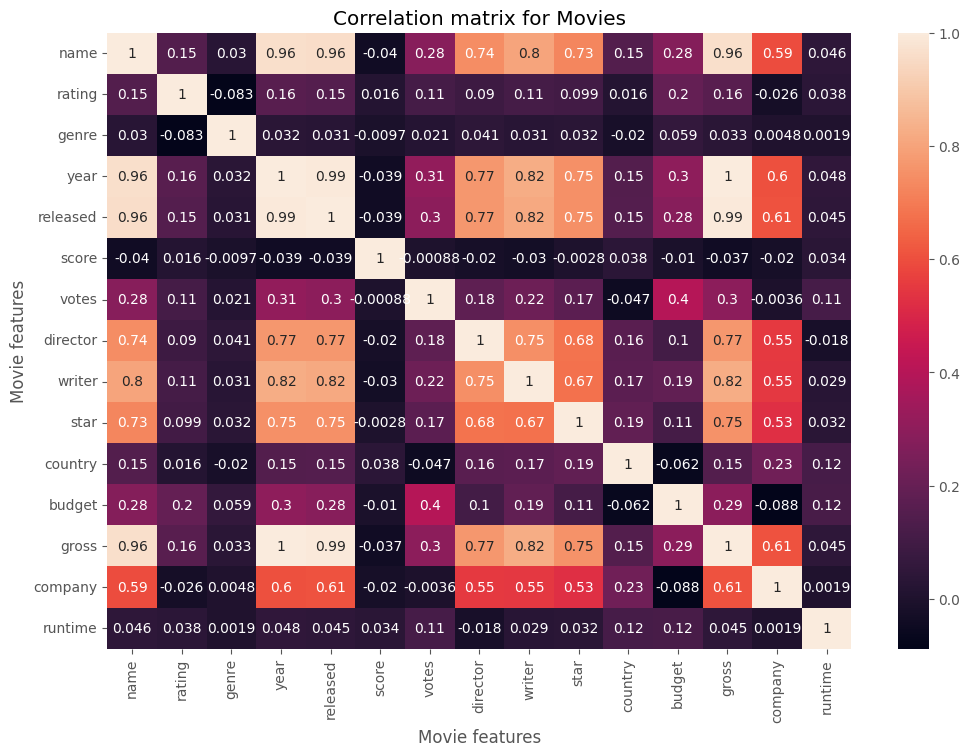

In [135]:

correlation_matrix = df1.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [136]:

correlation_mat = df1.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.148197
          genre       0.030281
          year        0.964746
          released    0.958840
          score      -0.040444
          votes       0.283260
          director    0.742323
          writer      0.801330
          star        0.727983
          country     0.148992
          budget      0.275762
          gross       0.964776
          company     0.592357
          runtime     0.045947
rating    name        0.148197
          rating      1.000000
          genre      -0.082605
          year        0.161988
          released    0.150491
          score       0.016412
          votes       0.110197
          director    0.090253
          writer      0.110411
          star        0.099393
          country     0.016066
          budget      0.195465
          gross       0.158689
          company    -0.025505
          runtime     0.038340
genre     name        0.030281
          rating     -0.082605
        

In [137]:

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

company   budget     -0.087841
budget    company    -0.087841
genre     rating     -0.082605
rating    genre      -0.082605
country   budget     -0.062355
budget    country    -0.062355
votes     country    -0.046664
country   votes      -0.046664
score     name       -0.040444
name      score      -0.040444
released  score      -0.039191
score     released   -0.039191
          year       -0.038545
year      score      -0.038545
gross     score      -0.037128
score     gross      -0.037128
          writer     -0.030064
writer    score      -0.030064
rating    company    -0.025505
company   rating     -0.025505
          score      -0.020372
score     company    -0.020372
director  score      -0.020058
score     director   -0.020058
genre     country    -0.019693
country   genre      -0.019693
runtime   director   -0.017734
director  runtime    -0.017734
score     budget     -0.010117
budget    score      -0.010117
genre     score      -0.009702
score     genre      -0.009702
company 

In [138]:

# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company   star        0.527795
star      company     0.527795
writer    company     0.546044
company   writer      0.546044
          director    0.551646
director  company     0.551646
name      company     0.592357
company   name        0.592357
          year        0.601908
year      company     0.601908
company   gross       0.607908
gross     company     0.607908
released  company     0.608885
company   released    0.608885
writer    star        0.672856
star      writer      0.672856
          director    0.678961
director  star        0.678961
name      star        0.727983
star      name        0.727983
director  name        0.742323
name      director    0.742323
writer    director    0.746847
director  writer      0.746847
star      released    0.752771
released  star        0.752771
year      star        0.753331
star      year        0.753331
          gross       0.754470
gross     star        0.754470
director  year        0.767312
year      director    0.767312
director